# Прикладное программное обеспечение
#### Python для извлечения и обработки данных


## Web-scraping: новостной сайт (дополнительный материал)
Социлогия | 1 курс | 3 модуль | Семинар 6

*Алла Тамбовцева, НИУ ВШЭ*

## От Татьяны, Валентины и Валентина :)

Этот блокнот - своеобразный бонус. Парсинг текстовых сайтов - это хороший прикладной навык. Здесь есть некоторые моменты, которые мы не проходили (например, сохранение файла через датафрейм pandas в эксель), но мы и не будем спрашивать этот материал на контрольных. Но для тех из вас, кто планирует продолжать использовать питон в своей учебе и работе будет очень полезно со всем этим разобраться.

## Web-scraping
Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2020/02/28/2c618ca4e38f497cce9225802f343e14.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:url"/>
<meta conten

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed " lang="" style="background-image:url(https://nplus1.ru/images/2020/02/28/2c618ca4e38f497cce9225802f343e14.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="apple-touch-icon.png" rel="apple-touch-icon"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta content="https://npl

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [8]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/oops
/theme/Courses
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/oops
/theme/Courses
https://nplus1.ru/blog/2020/02/26/discoveries-that-changed-medicine
https://nplus1.ru/blog/2020/02/26/discoveries-that-changed-medicine
https://nplus1.ru/blog/2020/02/20/epic-first-mission-to-pluto
https://nplus1.ru/blog/2020/02/17/3comma5-six/
https://nplus1.ru/blog/2020/02/17/hanky-panky-one
https://nplus1.ru/blog/2020/02/14/essential
https://nplus1.ru/blog/2020/02/13/age-of-conquests
https://nplus1.ru/blog/2020/02/11/the-life-and-times-of-black-holes
https://nplus1.ru/blog/2020/02/11/venus-hot-storms
https://nplus1.ru/blog/2020/02/08/starwars
https://nplus1.ru/blog/2020/02/27/diamond-princess
/news/2020/03/02/futprint50
/news/2020/02/29/y20
/news/2020/02/29/dyson
/news/2020/02/29/redHawk
/news/2020

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [9]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2020/03/02/futprint50',
 '/news/2020/02/29/y20',
 '/news/2020/02/29/dyson',
 '/news/2020/02/29/redHawk',
 '/news/2020/02/28/stiff-transversal-arch',
 '/news/2020/02/28/wing',
 '/news/2020/02/28/ALM-decision',
 '/news/2020/02/28/joker',
 '/news/2020/02/28/agn-outburst',
 '/news/2020/02/28/cyberuaz',
 '/news/2020/02/28/smol',
 '/news/2020/02/28/hypersonic',
 '/news/2020/02/28/dmv-report',
 '/news/2020/02/28/schizo',
 '/news/2020/02/28/glowing-frogs',
 '/news/2020/02/28/lofar-black-hole-search',
 '/news/2020/02/28/ehang',
 '/news/2020/02/28/arrw',
 '/news/2020/02/27/PAX1-fail',
 '/news/2020/02/27/neuron-chat',
 '/news/2020/02/26/resist-scam',
 '/news/2020/02/25/evidence-based-pedagogy',
 '/news/2020/02/26/quantum-diffusion',
 '/news/2020/02/24/first-results-from-insight',
 '/news/2020/02/27/neuron-chat',
 '/news/2020/02/28/ALM-decision',
 '/news/2020/02/27/fine-structure-black-hole',
 '/news/2020/02/27/stemdiabetes',
 '/news/2020/02/26/resist-scam',
 '/news/2020/02/26/atomtriads']

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [10]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2020/03/02/futprint50',
 'https://nplus1.ru/news/2020/02/29/y20',
 'https://nplus1.ru/news/2020/02/29/dyson',
 'https://nplus1.ru/news/2020/02/29/redHawk',
 'https://nplus1.ru/news/2020/02/28/stiff-transversal-arch',
 'https://nplus1.ru/news/2020/02/28/wing',
 'https://nplus1.ru/news/2020/02/28/ALM-decision',
 'https://nplus1.ru/news/2020/02/28/joker',
 'https://nplus1.ru/news/2020/02/28/agn-outburst',
 'https://nplus1.ru/news/2020/02/28/cyberuaz',
 'https://nplus1.ru/news/2020/02/28/smol',
 'https://nplus1.ru/news/2020/02/28/hypersonic',
 'https://nplus1.ru/news/2020/02/28/dmv-report',
 'https://nplus1.ru/news/2020/02/28/schizo',
 'https://nplus1.ru/news/2020/02/28/glowing-frogs',
 'https://nplus1.ru/news/2020/02/28/lofar-black-hole-search',
 'https://nplus1.ru/news/2020/02/28/ehang',
 'https://nplus1.ru/news/2020/02/28/arrw',
 'https://nplus1.ru/news/2020/02/27/PAX1-fail',
 'https://nplus1.ru/news/2020/02/27/neuron-chat',
 'https://nplus1.ru/news/2020/02/26/r

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [11]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [12]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2020-02-29" itemprop="datePublished"/>,
 <meta content="Василий Сычев" name="mediator_author"/>,
 <meta content="Новый самолет будет публично представлен в течение 2020 года" name="description"/>,
 <meta content="Василий Сычев" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Китайцы превратили транспортник Y-20 в летающий танкер" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2020/02/29/3532022a51e1563c221775f65f8d2464.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2020/02/29/y20" property="og:url"/>,
 <meta content="Новый самолет будет публично представлен в течение 2020 года" property="og:description"/>,
 <meta content="summary_

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [13]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Василий Сычев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [12]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Сергей Кузнецов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [13]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Сергей Кузнецов'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [14]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Сергей Кузнецов'

Аналогичным образом извлечем дату, заголовок и описание.

In [14]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [16]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="physics" href="/rubric/physics">Физика</a>
 <a data-theme="rip" href="/theme/rip">Памяти ученого</a>
 </p>, <p class="table">
 <a href="/news/2020/02/29">
 <time content="2020-02-29" data-unix="1582965147" itemprop="datePublished">
 <span>11:32</span>
 <span>29 Фев. 2020</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/1.2">
 <span>Сложность</span>
 <span class="difficult-value">1.2</span>
 </a>
 </p>, <p>Физик и математик Фримен Дайсон (Freeman Dyson), автор знаменитой концепции «сфер Дайсона» и участник разработки ядерного звездолета «Орион», скончался в возрасте 96 лет в минувшую пятницу, <a href="https://www.mainepublic.org/post/renowned-mathematician-and-physicist-freeman-dyson-has-died-age-96" rel="nofollow" target="_blank">сообщил</a> сайт Maine Public со ссылкой на дочь ученого Мию.</p>, <p>Дайсон закончил Кембриджский университет в 1945 году, став бакалавром по математике, но степени доктора не получил. С 1947 года он рабо

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [15]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="weapon" href="/rubric/weapon">Оружие</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [16]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Оружие']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [17]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">3.1</span>]

И выберем оттуда текст.

In [18]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'3.1'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [19]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [20]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [23]:
final_text = ' '.join(text)
print(final_text)
final_text.count('Y-20')

Китайская авиастроительная компания Xian завершила разработку самолета-заправщика на базе тяжелого транспортного самолета Y-20. Как пишет Flightglobal, ожидается, что первая публичная демонстрация нового самолета состоится в течение 2020 года. Транспортные самолеты считаются лучшей базой для разработки многих других видов военной авиационной техники. Они обладают большой грузоподъемностью, просторными грузовыми отсеками и могут находиться в воздухе длительное время. По этой причине многие страны мира создают на основе своих транспортных самолетов самолеты-заправщики, самолеты дальнего радиолокационного обзора, противолодочные самолеты и некоторые другие. Летающий танкер на базе Y-20 способен перевозить до 90 тонн топлива. Это втрое больше объема, который может нести самолет-заправщик на базе H-6 (лицензионная копия советского бомбардировщика Ту-16). На новый китайский заправщик установлена система передачи топлива «шланг-конус». Другие подробности о новом самолете пока не раскрываются.

8

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [24]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [27]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [28]:
from time import sleep

In [32]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for i, link in enumerate(full_urls):
    res = GetNews(link)
    news.append(res)
    print(i, 'form', len(full_urls))
    #sleep(0.1) # задержка в 3 секунды

0 form 30
1 form 30
2 form 30
3 form 30
4 form 30
5 form 30
6 form 30
7 form 30
8 form 30
9 form 30
10 form 30
11 form 30
12 form 30
13 form 30
14 form 30
15 form 30
16 form 30
17 form 30
18 form 30
19 form 30
20 form 30
21 form 30
22 form 30
23 form 30
24 form 30
25 form 30
26 form 30
27 form 30
28 form 30
29 form 30


Так теперь выглядит первый элемент списка:

In [48]:
from collections import Counter
Counter(news[0][5].split()).most_common()[:10]

[('сложности', 11),
 ('и', 10),
 ('Коэффициент', 10),
 ('в', 9),
 ('на', 8),
 ('для', 5),
 ('самолета', 4),
 ('с', 4),
 ('года.', 4),
 ('В', 4)]

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(news)

In [36]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2020/03/02/futprint50,2020-03-02,Василий Сычев,Новый самолет может приступить к регулярным по...,Европейцы занялись разработкой 50-местного гиб...,Евросоюз дал старт программе разработки гибрид...,[Авиация],3.1
1,https://nplus1.ru/news/2020/02/29/y20,2020-02-29,Василий Сычев,Новый самолет будет публично представлен в теч...,Китайцы превратили транспортник Y-20 в летающи...,Китайская авиастроительная компания Xian завер...,[Оружие],3.1


Переименуем столбцы в базе.

In [37]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [38]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2020/03/02/futprint50,2020-03-02,Василий Сычев,Новый самолет может приступить к регулярным по...,Европейцы занялись разработкой 50-местного гиб...,Евросоюз дал старт программе разработки гибрид...,[Авиация],3.1
1,https://nplus1.ru/news/2020/02/29/y20,2020-02-29,Василий Сычев,Новый самолет будет публично представлен в теч...,Китайцы превратили транспортник Y-20 в летающи...,Китайская авиастроительная компания Xian завер...,[Оружие],3.1


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [39]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [40]:
df.diffc.describe()

count    30.000000
mean      3.623333
std       1.379576
min       1.200000
25%       3.100000
50%       3.550000
75%       4.575000
max       6.400000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

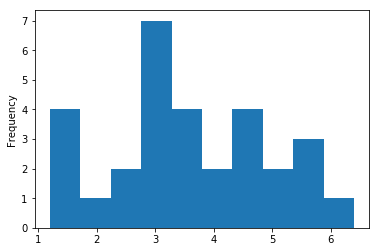

In [41]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [42]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [43]:
df.text[0]

'Евросоюз дал старт программе разработки гибридного 50-местного пассажирского самолета для региональных перевозок, который может начать выполнять регулярные рейсы с\xa02035-2040\xa0года. Как пишет Aviation Week, первый этап проекта рассчитан на\xa0разработку технологий, которые могут быть использованы в\xa0перспективном самолете, также определение конфигураций летательного аппарата. Сегодня авиакомпании и\xa0разработчики авиационной техники вынуждены искать способы уменьшить количество выбросов вредных веществ. В\xa0частности, авиакомпании, принявшие рекомендации Международной организации гражданской авиации, должны поддерживать уровень выброса углекислого газа не\xa0выше уровня 2020\xa0года. Кроме того, авиаперевозчикам к\xa02050 году необходимо сократить объемы выбросов вредных веществ, в\xa0том числе углекислого газа, на\xa050\xa0процентов по\xa0сравнению с\xa0уровнем 2005\xa0года. Считается, что переход на\xa0гибридные и\xa0электрические летательные аппараты позволит существенно со

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [44]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [45]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')